In [1]:
%run hamiltonian_mz_k.ipynb

0b110111 0b110111 0b110111 0 0 8 8


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'serif', 'font.serif': ['Times New Roman']})

### Lanczos algorithm

In [5]:
def lanczos(H, k, v0=None):
    # H: symmetric matrix (n x n)
    # k: number of Lanczos steps (k <= n)
    # v0: initial vector (optional, default random)

    n = H.shape[0]
    if v0 is None:
        v0 = np.random.rand(n)
    v0 = v0 / np.linalg.norm(v0)

    V = np.zeros((n, k))
    alpha = np.zeros(k)
    beta = np.zeros(k)

    V[:, 0] = v0
    w = H @ v0
    alpha[0] = np.dot(v0, w)
    w = w - alpha[0] * v0

    for j in range(1, k):
        beta[j-1] = np.linalg.norm(w)
        if np.isclose(beta[j-1], 0):
            return alpha[:j], beta[:j-1], V[:, :j]
        V[:, j] = w / beta[j-1]

        w = H @ V[:, j]
        alpha[j] = np.dot(V[:, j], w)
        w = w - alpha[j] * V[:, j] - beta[j-1] * V[:, j-1]

    return alpha, beta[:-1], V

def lanczos_diagonalization(H, k):
    alpha, beta, V = lanczos(H, k)
    T = np.diag(alpha) + np.diag(beta, 1) + np.diag(beta, -1)
    eigvals, eigenvecs = np.linalg.eigh(T)

    return eigvals

### Test of Lanczos on a random (symmetric) matrix

Approximate eigenvalues: [-6.363e+00 -4.327e-02  4.999e+00  9.943e+01]
Exact eigenvalues: [-7.862e+00 -7.674e+00 -7.343e+00 -6.925e+00 -6.896e+00 -6.522e+00
 -6.464e+00 -6.113e+00 -5.939e+00 -5.800e+00 -5.626e+00 -5.342e+00
 -5.224e+00 -5.065e+00 -4.932e+00 -4.820e+00 -4.601e+00 -4.264e+00
 -4.244e+00 -4.133e+00 -3.889e+00 -3.703e+00 -3.495e+00 -3.423e+00
 -3.270e+00 -3.164e+00 -2.925e+00 -2.830e+00 -2.788e+00 -2.610e+00
 -2.531e+00 -2.262e+00 -2.083e+00 -1.995e+00 -1.961e+00 -1.715e+00
 -1.600e+00 -1.312e+00 -1.297e+00 -1.201e+00 -8.450e-01 -7.899e-01
 -6.479e-01 -5.896e-01 -5.680e-01 -4.216e-01 -2.185e-01 -1.504e-01
 -8.530e-02  1.396e-01  1.482e-01  3.666e-01  3.944e-01  5.193e-01
  7.121e-01  7.679e-01  9.916e-01  1.029e+00  1.224e+00  1.278e+00
  1.448e+00  1.586e+00  1.758e+00  1.930e+00  2.084e+00  2.131e+00
  2.218e+00  2.350e+00  2.420e+00  2.634e+00  2.818e+00  2.963e+00
  3.080e+00  3.214e+00  3.252e+00  3.390e+00  3.444e+00  3.756e+00
  3.825e+00  3.881e+00  4.166e+00  4.34

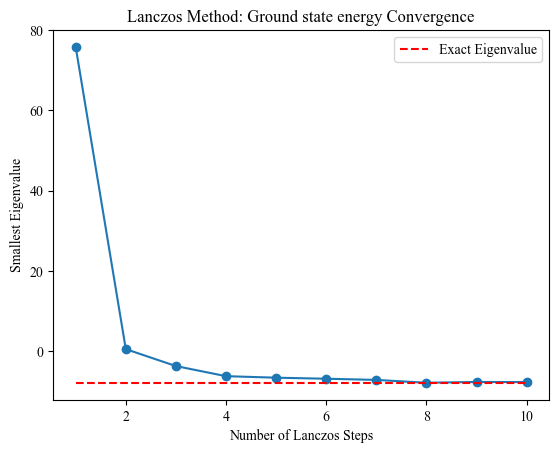

In [ ]:
n = 100
np.random.seed(0)  
H = np.random.random((n, n))
H = H + H.T # make it symmetric

k = 4 
eigvals = lanczos_diagonalization(H, k)

print("Approximate eigenvalues:", eigvals)
w, v = np.linalg.eigh(H)
print("Exact eigenvalues:", w)

plot_list = []
for k in range(1, 11):
    eigvals = lanczos_diagonalization(H, k)
    plot_list.append(np.sort(eigvals)[0])

print("Plot list:", plot_list)

plt.title('Lanczos Method: Ground state energy Convergence')
plt.plot([x+1 for x in range(len(plot_list))], plot_list, marker='o')
plt.hlines(np.sort(w)[0], xmin=1, xmax=len(plot_list), color='r', linestyle='--', label='Exact Eigenvalue')
plt.xlabel('Number of Lanczos Steps')
plt.ylabel('Smallest Eigenvalue')
plt.legend()
plt.show()

### Run Lanczos on Hamiltonian

In [ ]:
N = 10
H = hamiltonian_mz_k(N, mz=0, k=5)

plot_list = []
for k in range(1, 15):
    eigvals = lanczos_diagonalization(H, k)
    plot_list.append(np.sort(eigvals)[0])

w = np.linalg.eigh(H)[0] # exact eigenvalues

# plot
plt.title('Lanczos Method: Ground state energy convergence in sector mz=0, k=5 (N=10)')
plt.plot([x+1 for x in range(len(plot_list))], plot_list, marker='o', linestyle='--', color='k')
plt.hlines(np.sort(w)[0], xmin=1, xmax=len(plot_list), color='r', linestyle='--', label='ground state energy = {:.3f}'.format(np.sort(w)[0]))
plt.xlabel('Number of Lanczos Steps')
plt.ylabel('Smallest Eigenvalue')
plt.legend()
# plt.show()
plt.savefig('plots/lanczos_mz_k.png', dpi=300, bbox_inches='tight')